In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size':18})

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 1.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 1.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 1.0000e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 1.0000e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 1.0000e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.0000e+00]]


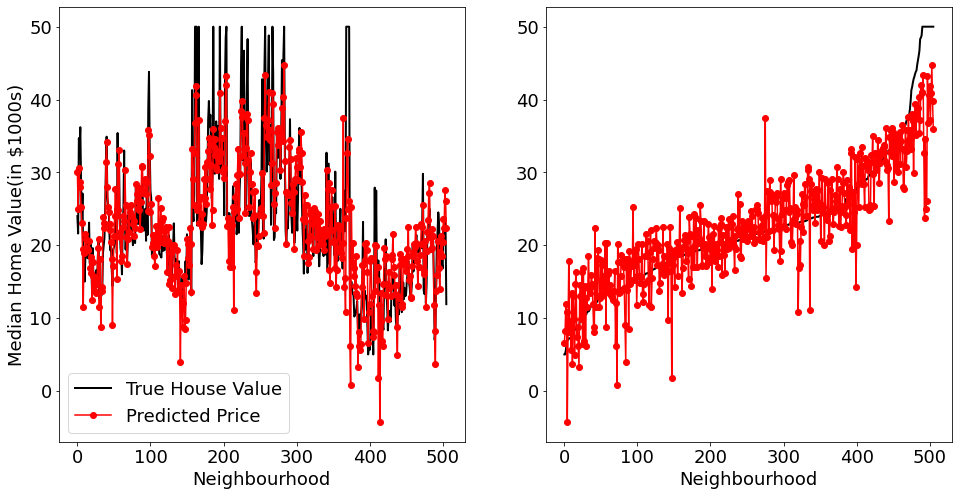

In [4]:
H = np.loadtxt(os.path.join('../../DATA/housing.data'))
b = H[:,-1] #the price of house in $1000s
A = H[:,:-1] # factors determining the price of house
#adding extra column of all 1s at the initial position
A = np.pad(A,[(0,0),(0,1)], mode='constant', constant_values=1)
#split into train and test set
# n = 253
# btrain = b[1:n]
# Atrain = A[1:n]
# btest = b[n:]
# Atest = A[n:]

x_tilde = np.linalg.pinv(A)@b
new_b = A@x_tilde

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b,Color='k',LineWidth=2, label='True House Value')
plt.plot(new_b,'-o',Color='r',LineWidth=1.5,label='Predicted Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Home Value(in $1000s)')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] # sorted values
plt.plot(b,Color='k',LineWidth=2,label='True Housing Value')
plt.plot(A[sort_ind,:]@x_tilde,'-o',Color='r',LineWidth=1.5,MarkerSize=6,label='Regression')
plt.xlabel('Neighbourhood')
plt.legend

plt.show()

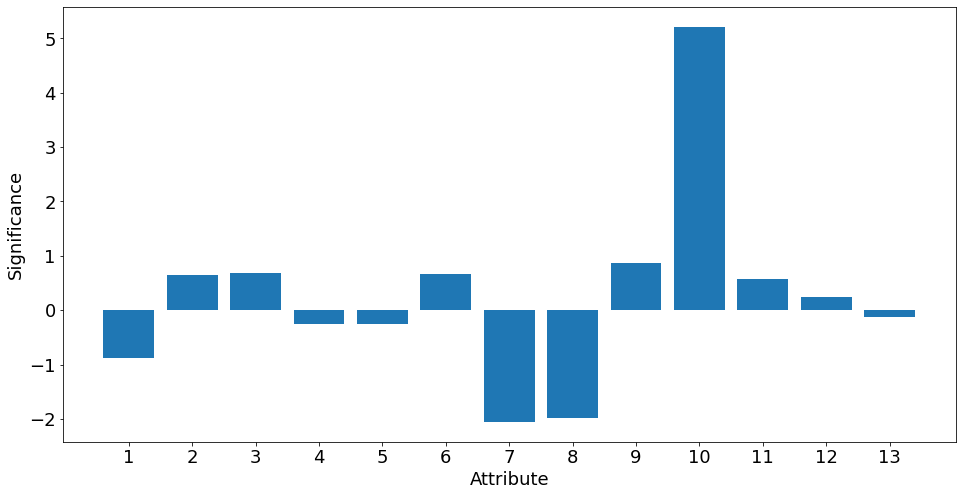

In [7]:
# mean from top to bottom
A_mean = np.mean(A,axis=0)
#reshape it to column vector
A_mean = A_mean.reshape(-1,1)
#create the matrix that shows significance of each feature on all A
A2 = A - np.ones((A.shape[0],1)) @ A_mean.T
for j in range(A.shape[1]-1):
    #replace each value of A2 with (A2/std of each column)
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std

A2[:,-1] = np.ones(A.shape[0])
x = np.linalg.pinv(A2) @ b
# U, S, VT = np.linalg.svd(A2,full_matrices=0)
# x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()


In [27]:
np.ones((A.shape[0],1)) # creates 506 x 1 matrix
A.shape

(506, 14)

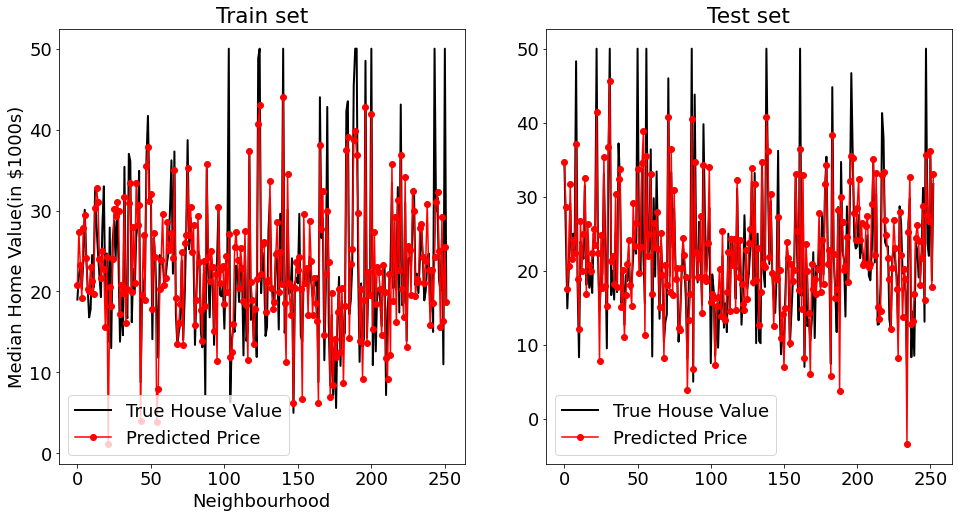

In [41]:
H = np.loadtxt(os.path.join('../../DATA/housing.data'))
b = H[:,-1] #the price of house in $1000s
A = H[:,:-1] # factors determining the price of house
#adding extra column of all 1s at the initial position
A = np.pad(A,[(0,0),(0,1)], mode='constant', constant_values=1)

#split into train and test set
n = 253
#randomly returns different indices from index 0-506
p = np.random.permutation(506)
A=A[p,:]
b = b[p]
btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]

x_tilde = np.linalg.pinv(Atrain)@btrain
new_b_train = Atrain@x_tilde

fig = plt.figure()
ax1 = fig.add_subplot(121)


plt.plot(btrain,Color='k',LineWidth=2, label='True House Value')
plt.plot(new_b_train,'-o',Color='r',LineWidth=1.5,label='Predicted Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Home Value(in $1000s)')
plt.title('Train set')
plt.legend()

#for testing 
ax1 = fig.add_subplot(122)
new_b_test = Atest@x_tilde
plt.plot(btest,Color='k',LineWidth=2,label='True House Value')
plt.plot(new_b_test,'-o',Color='r',LineWidth=1.5,label='Predicted Price')
plt.title('Test set')
plt.legend()
plt.plot()

# ax2 = fig.add_subplot(122)
# sort_ind = np.argsort(H[:,-1])
# b = b[sort_ind] # sorted values
# plt.plot(b,Color='k',LineWidth=2,label='True Housing Value')
# plt.plot(A[sort_ind,:]@x_tilde,'-o',Color='r',LineWidth=1.5,MarkerSize=6,label='Regression')
# plt.xlabel('Neighbourhood')
# plt.legend

plt.show()

In [8]:
a1 = np.arange(15).reshape(5,3)
a1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [ ]:
stda1 = a1.std()